In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

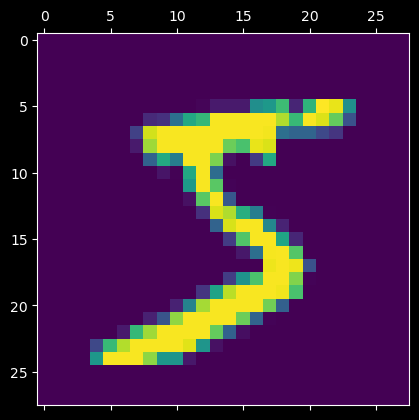

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[2]

4

In [8]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [11]:
X_train_flattened.shape


(60000, 784)

In [12]:
X_test_flattened.shape

(10000, 784)

In [13]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

2024-06-13 23:08:26.963562: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-06-13 23:08:26.963582: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-13 23:08:26.963588: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-13 23:08:26.963813: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-13 23:08:26.963831: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5
  36/1875 [..............................] - ETA: 5s - loss: 1.9320 - accuracy: 0.3984

2024-06-13 23:08:27.420691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4701 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3039 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2831 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9257


In [14]:
model.evaluate(X_test_flattened, y_test)

 53/313 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.9092

2024-06-13 23:08:55.833484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.2652 - accuracy: 0.9272


[0.2652412950992584, 0.9272000193595886]

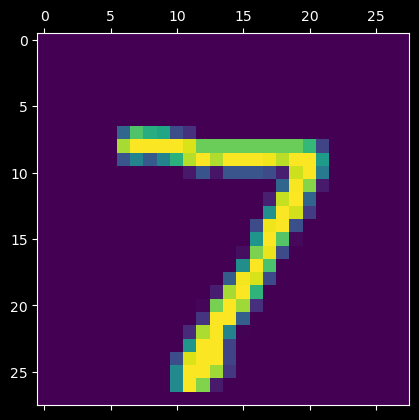

In [15]:
plt.matshow(X_test[0])

In [16]:
y_pred = model.predict(X_test_flattened)
np.argmax(y_pred[0])

151/313 [=============>................] - ETA: 0s

2024-06-13 23:08:56.981526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 967us/step


7

In [17]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

<Axes: >

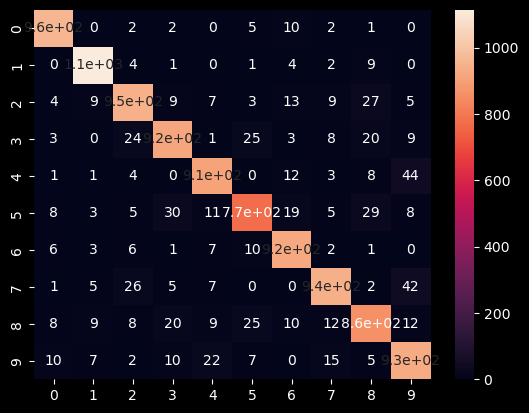

In [18]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
sns.heatmap(cm, annot=True)

In [20]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
  17/1875 [..............................] - ETA: 6s - loss: 2.1756 - accuracy: 0.2904  

2024-06-13 23:09:53.775085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4259 - accuracy: 0.8935
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2025 - accuracy: 0.9425
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1513 - accuracy: 0.9568
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1194 - accuracy: 0.9658
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0979 - accuracy: 0.9717


In [21]:
model.evaluate(X_test_flattened, y_test)

 48/313 [===>..........................] - ETA: 0s - loss: 0.1297 - accuracy: 0.9570

2024-06-13 23:10:38.635377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.1084 - accuracy: 0.9672


[0.1083594262599945, 0.967199981212616]

In [22]:
y_pred = model.predict(X_test_flattened)
np.argmax(y_pred[0])

136/313 [============>.................] - ETA: 0s

2024-06-13 23:11:15.519884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


7

In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

<Axes: >

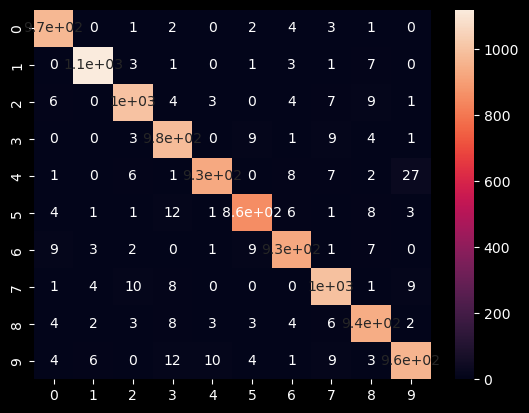

In [24]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
sns.heatmap(cm, annot=True)